In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import os

In [2]:
# path = '../input/insects-recognition'
path = '../input/insects-recognition'

In [3]:
batch_size = 100

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                                   rotation_range=40, horizontal_flip=True,
                                   fill_mode='nearest')

train_gen = train_datagen.flow_from_directory(path, target_size=(150,150),
                    class_mode='categorical', batch_size=batch_size, 
                                              subset='training')

val_gen = train_datagen.flow_from_directory(path, target_size=(150,150),
                class_mode='categorical', batch_size=batch_size,
                                            subset='validation')

Found 3561 images belonging to 5 classes.
Found 888 images belonging to 5 classes.


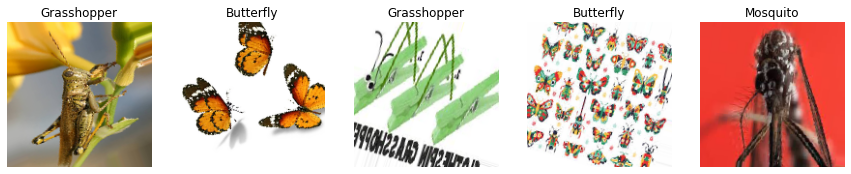

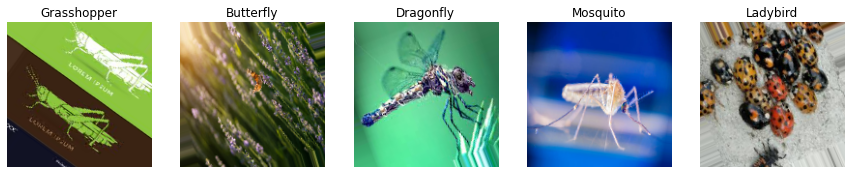

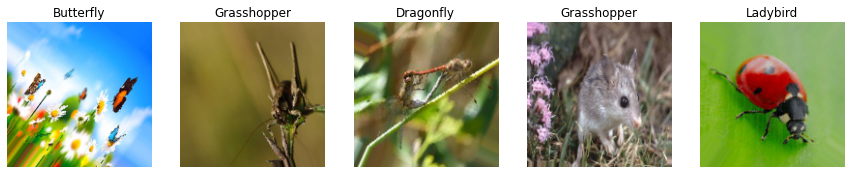

In [4]:
labels = ['Butterfly', 'Dragonfly', 'Grasshopper', 'Ladybird', 'Mosquito']
for i in range(15):
    if i%5==0:
        fig, ax = plt.subplots(ncols=5, figsize=(15,15))
    img, lbl = train_gen.next()
    ax[i%5].imshow(img[2])
    ax[i%5].set_title(labels[np.argmax(lbl[2])])
    ax[i%5].grid(False)
    ax[i%5].axis(False)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',
                input_shape=(150, 150, 3), padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',
                input_shape=(150, 150, 3), padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
        
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(5, activation='softmax')     
])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 128)      

In [9]:
steps, val_steps = train_gen.n/batch_size, val_gen.n/batch_size
num_epochs = 100

In [10]:
history = model.fit(train_gen, validation_data=val_gen, epochs=num_epochs,
                    steps_per_epoch=steps, validation_steps=val_steps)

Epoch 1/100
36/35 [==============================] - 45s 1s/step - loss: 1.6132 - accuracy: 0.2252 - val_loss: 1.5978 - val_accuracy: 0.2331
Epoch 2/100
36/35 [==============================] - 31s 875ms/step - loss: 1.5792 - accuracy: 0.2533 - val_loss: 1.6003 - val_accuracy: 0.2421
Epoch 3/100
36/35 [==============================] - 32s 878ms/step - loss: 1.5679 - accuracy: 0.2887 - val_loss: 1.5950 - val_accuracy: 0.2286
Epoch 4/100
36/35 [==============================] - 32s 881ms/step - loss: 1.4376 - accuracy: 0.3426 - val_loss: 1.6213 - val_accuracy: 0.2714
Epoch 5/100
36/35 [==============================] - 32s 885ms/step - loss: 1.3748 - accuracy: 0.3867 - val_loss: 1.4154 - val_accuracy: 0.3514
Epoch 6/100
36/35 [==============================] - 32s 880ms/step - loss: 1.3301 - accuracy: 0.4052 - val_loss: 1.4019 - val_accuracy: 0.3953
Epoch 7/100
36/35 [==============================] - 32s 893ms/step - loss: 1.2989 - accuracy: 0.4297 - val_loss: 1.4504 - val_accuracy: 0.

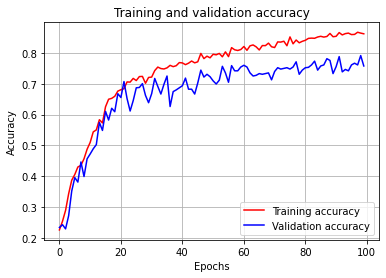

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=4)
plt.grid(axis='both')

plt.show() 

In [12]:
test_loss, test_acc = model.evaluate(val_gen)
print('test accuracy : ', test_acc)

9/9 [==============================] - 5s 543ms/step - loss: 0.7946 - accuracy: 0.7545
test accuracy :  0.7545045018196106


In [21]:
model.save("./model.h5")

In [27]:
from tensorflow import keras

In [41]:
from tensorflow.keras.preprocessing import image

In [42]:
# Check our folder and import the model with best validation accuracy
loaded_best_model = keras.models.load_model("./model.h5")

# Custom function to load and predict label for the image
def predict(img_rel_path):
    # Import Image from the path with size of (150, 150)
    img = image.load_img(img_rel_path, target_size=(150, 150))

    # Convert Image to a numpy array
    img = image.img_to_array(img, dtype=np.uint8)

    # Scaling the Image Array values between 0 and 1
    img = np.array(img)/255.0

    # Plotting the Loaded Image
    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    # Get the Predicted Label for the loaded Image
    p = loaded_best_model.predict(img[np.newaxis, ...])

    # Label array
    labels = {0: 'Mariposa', 1: 'Libelula', 2: 'Saltamontes', 3: 'Mariquita', 4: 'Mosquito'}

    print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print("Classified:", predicted_class, "\n\n")

    classes=[]
    prob=[]
    print("\n-------------------Individual Probability--------------------------------\n")

    for i,j in enumerate (p[0],0):
        print(labels[i].upper(),':',round(j*100,2),'%')
        classes.append(labels[i])
        prob.append(round(j*100,2))
        
    def plot_bar_x():
        # this is for plotting purpose
        index = np.arange(len(classes))
        plt.bar(index, prob)
        plt.xlabel('Labels', fontsize=8)
        plt.ylabel('Probability', fontsize=8)
        plt.xticks(index, classes, fontsize=8, rotation=20)
        plt.title('Probability for loaded image')
        plt.show()
    plot_bar_x()

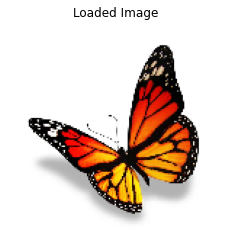



Maximum Probability:  1.0
Classified: Mariposa 



-------------------Individual Probability--------------------------------

MARIPOSA : 100.0 %
LIBELULA : 0.0 %
SALTAMONTES : 0.0 %
MARIQUITA : 0.0 %
MOSQUITO : 0.0 %


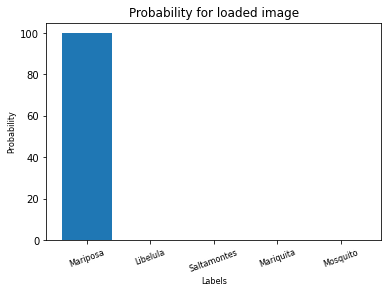

In [43]:
# Unseen Dataset
predict("../input/insectos-dataset-prueba/00000001.jpg")

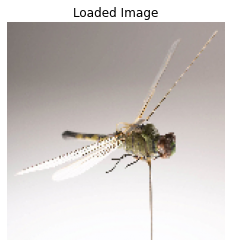



Maximum Probability:  0.91798276
Classified: Saltamontes 



-------------------Individual Probability--------------------------------

MARIPOSA : 0.02 %
LIBELULA : 8.06 %
SALTAMONTES : 91.8 %
MARIQUITA : 0.0 %
MOSQUITO : 0.12 %


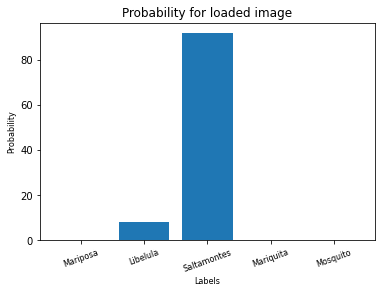

In [44]:
predict("../input/data-prueba-joshe/0000002.jpeg")

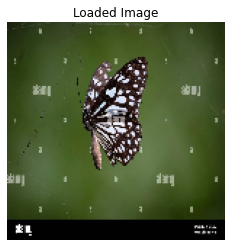



Maximum Probability:  0.9661085
Classified: Mariposa 



-------------------Individual Probability--------------------------------

MARIPOSA : 96.61 %
LIBELULA : 0.15 %
SALTAMONTES : 3.0 %
MARIQUITA : 0.13 %
MOSQUITO : 0.11 %


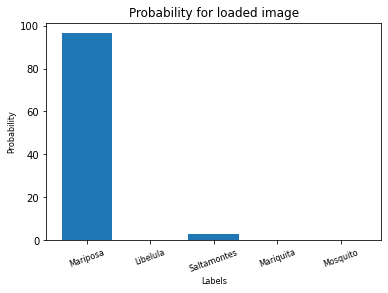

In [45]:
predict("../input/data-prueba-joshe/0000003.jpeg")

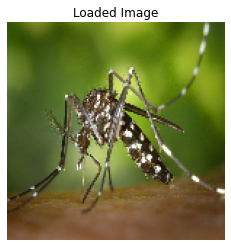



Maximum Probability:  0.99787533
Classified: Mosquito 



-------------------Individual Probability--------------------------------

MARIPOSA : 0.0 %
LIBELULA : 0.19 %
SALTAMONTES : 0.02 %
MARIQUITA : 0.0 %
MOSQUITO : 99.79 %


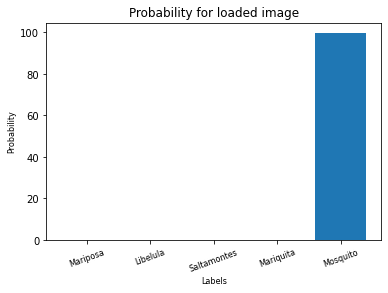

In [46]:
predict("../input/data-prueba-joshe/0000004.jpeg")

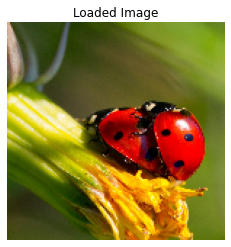



Maximum Probability:  0.99999976
Classified: Mariquita 



-------------------Individual Probability--------------------------------

MARIPOSA : 0.0 %
LIBELULA : 0.0 %
SALTAMONTES : 0.0 %
MARIQUITA : 100.0 %
MOSQUITO : 0.0 %


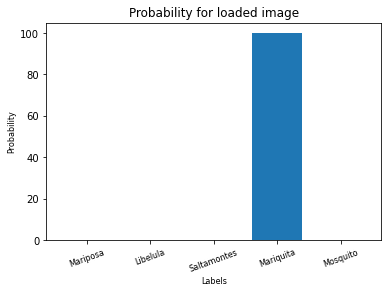

In [47]:
predict("../input/data-prueba-joshe/0000005.jpeg")

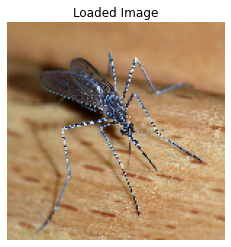



Maximum Probability:  0.6703292
Classified: Libelula 



-------------------Individual Probability--------------------------------

MARIPOSA : 0.2 %
LIBELULA : 67.03 %
SALTAMONTES : 0.7 %
MARIQUITA : 0.0 %
MOSQUITO : 32.06 %


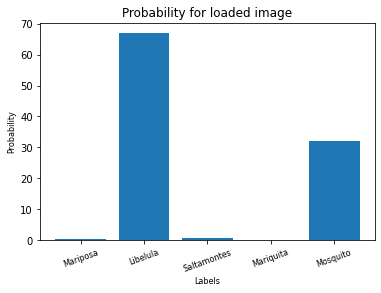

In [48]:
predict("../input/data-prueba-joshe/000006.jpeg")